In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns 

In [17]:
res1 = {'resnet18': './results/KFOLD_5_resnet18_s42/summary_test.csv' }
res2 = {'resnet50': './results/KFOLD_5_resnet50_s42/summary_test.csv'}
res3 = {'effnetb0': './results/KFOLD_5_effnetb0_s42/summary_test.csv'}
res4 = {'densenet121': './results/KFOLD_5_densenet121_s42/summary_test.csv'}

res5 = {'resnet18': './eval_results/KFOLD_5_resnet18_MIDOG2/summary.csv' }
res6 = {'resnet50': './eval_results/KFOLD_5_resnet50_MIDOG2/summary.csv'}
res7 = {'effnetb0': './eval_results/KFOLD_5_effnetb0_MIDOG2/summary.csv'}
res8 = {'densenet121': './eval_results/KFOLD_5_densenet121_MIDOG2/summary.csv'}

res9 = {'resnet18': './results/KFOLD_10_resnet18_s42/summary_test.csv' }
res10 = {'resnet50': './results/KFOLD_10_resnet50_s42/summary_test.csv'}
res11 = {'effnetb0': './results/KFOLD_10_effnetb0_s42/summary_test.csv'}
res12 = {'densenet121': './results/KFOLD_10_densenet121_s42/summary_test.csv'}

res13 = {'resnet18': './eval_results/KFOLD_10_resnet18_MIDOG2/summary.csv' }
res14 = {'resnet50': './eval_results/KFOLD_10_resnet50_MIDOG2/summary.csv'}
res15 = {'effnetb0': './eval_results/KFOLD_10_effnetb0_MIDOG2/summary.csv'}
res16 = {'densenet121': './eval_results/KFOLD_10_densenet121_MIDOG2/summary.csv'}


res17 = {'resnet18': './results/KFOLD_3_resnet18_s42/summary_test.csv' }
res18 = {'resnet50': './results/KFOLD_3_resnet50_s42/summary_test.csv'}
res19 = {'effnetb0': './results/KFOLD_3_effnetb0_s42/summary_test.csv'}
res20 = {'densenet121': './results/KFOLD_3_densenet121_s42/summary_test.csv'}

res21 = {'resnet18': './eval_results/KFOLD_3_resnet18_MIDOG2/summary.csv' }
res22 = {'resnet50': './eval_results/KFOLD_3_resnet50_MIDOG2/summary.csv'}
res23 = {'effnetb0': './eval_results/KFOLD_3_effnetb0_MIDOG2/summary.csv'}
res24 = {'densenet121': './eval_results/KFOLD_3_densenet121_MIDOG2/summary.csv'}

In [18]:
def combine_results(res_dicts, folds):
    dfs = []
    for res in res_dicts:
        for key, value in res.items():
            df = pd.read_csv(value).iloc[:, 1:]
            df['type'] = key
            df['folds'] = folds
        dfs.append(df)
    dfs = pd.concat(dfs, axis=0)
    return dfs 

In [19]:
test_df = combine_results((res1, res2, res3, res4), folds=5)
infer_df = combine_results((res5, res6, res7, res8), folds=5)
test_10_df = combine_results((res9, res10, res11, res12), folds=10)
infer_10_df = combine_results((res13, res14, res15, res16), folds=10)
test_3_df = combine_results((res17, res18, res19, res20), folds=3)
infer_3_df = combine_results((res21, res22, res23, res24), folds=3)

In [20]:
all_test_res = pd.concat([test_df, test_10_df, test_3_df], axis=0)
all_infer_res = pd.concat([infer_df, infer_10_df, infer_3_df], axis=0)

In [21]:
# palette = ['#ff6f59', '#254441', '#43aa8b', '#b2b09b']
palette = ['#ed6a5a', '#f4f1bb', '#9bc1bc', '#5d576b']
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, context='notebook', palette=palette)

In [41]:
def show_kfold_result(results, var_name, save_name, palette=None, ylabel='F1-Score', xlabel='',ylim=(0, 1), grouped=False):
    minor_ticks = np.arange(0,1,0.1)
    fig, ax = plt.subplots()
    if grouped:
        sns.barplot(results, x='type', y=var_name, hue='folds', ax=ax, errorbar='sd', palette=palette)
    else:
        sns.barplot(results, x='type', y=var_name, ax=ax, errorbar='sd', palette=palette)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_ylim(ylim)
    # ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8])
    ax.set_yticks(minor_ticks, minor=True)
    ax.set_xticklabels(('Resnet18', 'Resnet50', 'Efficientnet_b0', 'Densenet121'))
    plt.grid(axis='y', which='both')
    if grouped:
        ax.legend(loc='right', bbox_to_anchor=(1.17, 0.5),
          frameon=False, ncol=1, title ='Folds')
    plt.savefig(save_name, bbox_inches='tight')
    plt.show()


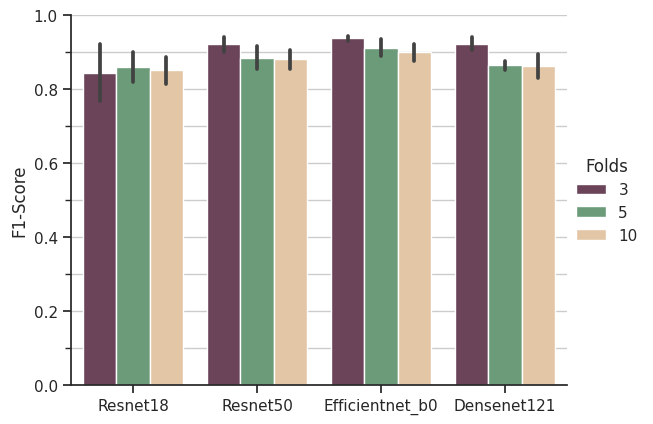

In [42]:
palette = ["#713e5a","#63a375","#edc79b"]
var_name = 'final/test_BinaryF1Score'
save_name = './plots/KFOLD_ALL_test.jpg'
show_kfold_result(all_test_res, var_name, save_name, grouped=True, palette=palette)

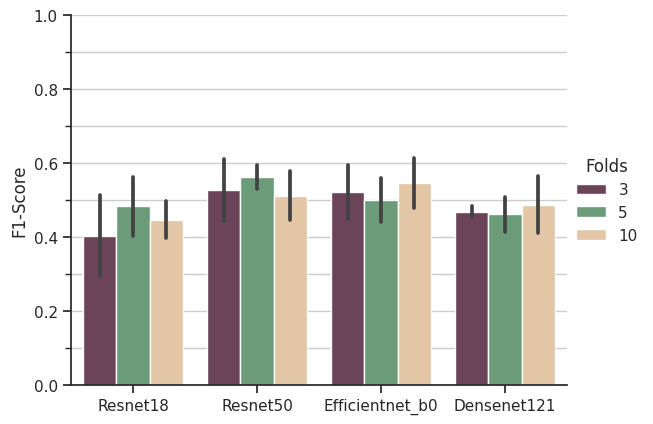

In [43]:
palette = ["#713e5a","#63a375","#edc79b"]
var_name = 'BinaryF1Score'
save_name = './plots/KFOLD_ALL_infer.jpg'
show_kfold_result(all_infer_res, var_name, save_name, grouped=True, palette=palette)

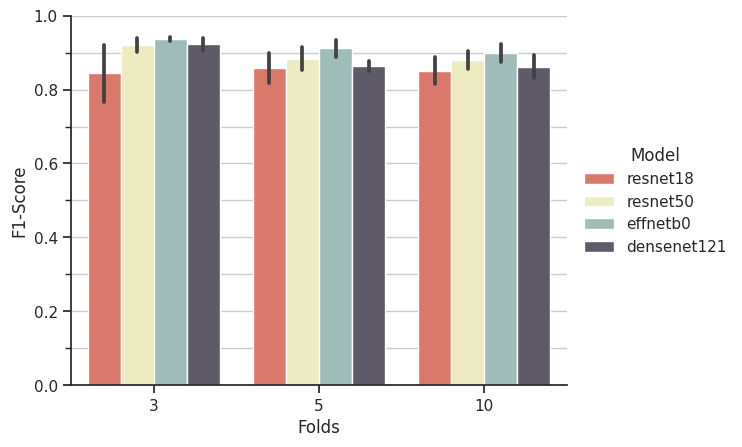

In [49]:
fig, ax = plt.subplots()
sns.barplot(all_test_res, x='folds', y='final/test_BinaryF1Score', hue='type', ax=ax, errorbar='sd')
ax.set_ylabel('F1-Score')
ax.set_xlabel('Folds')
ax.set_ylim(0, 1)
# ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8])
# ax.set_xticklabels(('Resnet18', 'Resnet50', 'Efficientnet_b0', 'Densenet121'))
minor_ticks = np.arange(0,1,0.1)
ax.set_yticks(minor_ticks, minor=True)
plt.grid(axis='y', which='both')
ax.legend(loc='right', bbox_to_anchor=(1.35, 0.5),
    frameon=False, ncol=1, title ='Model')
plt.savefig('./plots/KFOLD_ALL_FOLDSX_test.jpg', bbox_inches='tight')
plt.show()

In [45]:
all_test_res.groupby(['folds', 'type']).agg({'final/test_BinaryF1Score': ['mean', 'std']})

final/test_BinaryF1Score          
                                      mean       std
folds type                                          
3     densenet121                 0.922141  0.017684
      effnetb0                    0.936973  0.006024
      resnet18                    0.844026  0.076432
      resnet50                    0.920708  0.019479
5     densenet121                 0.863799  0.012515
      effnetb0                    0.911725  0.023672
      resnet18                    0.858491  0.040717
      resnet50                    0.883924  0.030903
10    densenet121                 0.862141  0.032117
      effnetb0                    0.898761  0.024020
      resnet18                    0.850450  0.036395
      resnet50                    0.879903  0.024989

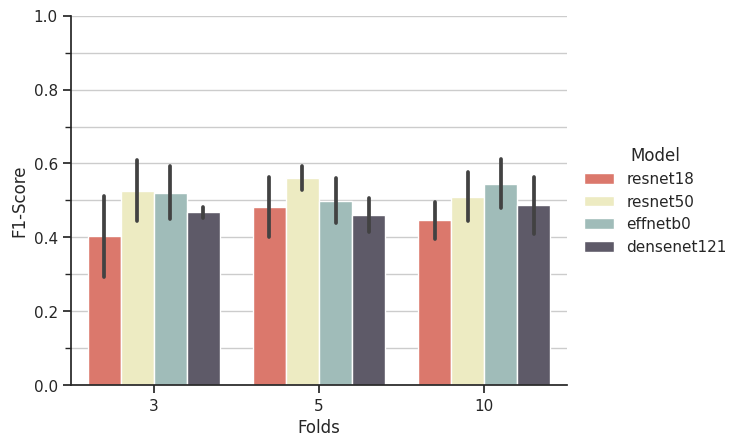

In [50]:
fig, ax = plt.subplots()
sns.barplot(all_infer_res, x='folds', y='BinaryF1Score', hue='type', ax=ax, errorbar='sd')
ax.set_ylabel('F1-Score')
ax.set_xlabel('Folds')
ax.set_ylim(0, 1)
# ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8])
# ax.set_xticklabels(('Resnet18', 'Resnet50', 'Efficientnet_b0', 'Densenet121'))
minor_ticks = np.arange(0,1,0.1)
ax.set_yticks(minor_ticks, minor=True)
plt.grid(axis='y', which='both')
ax.legend(loc='right', bbox_to_anchor=(1.35, 0.5),
    frameon=False, ncol=1, title ='Model')
plt.savefig('./plots/KFOLD_ALL_FOLDSX_infer.jpg', bbox_inches='tight')
plt.show()

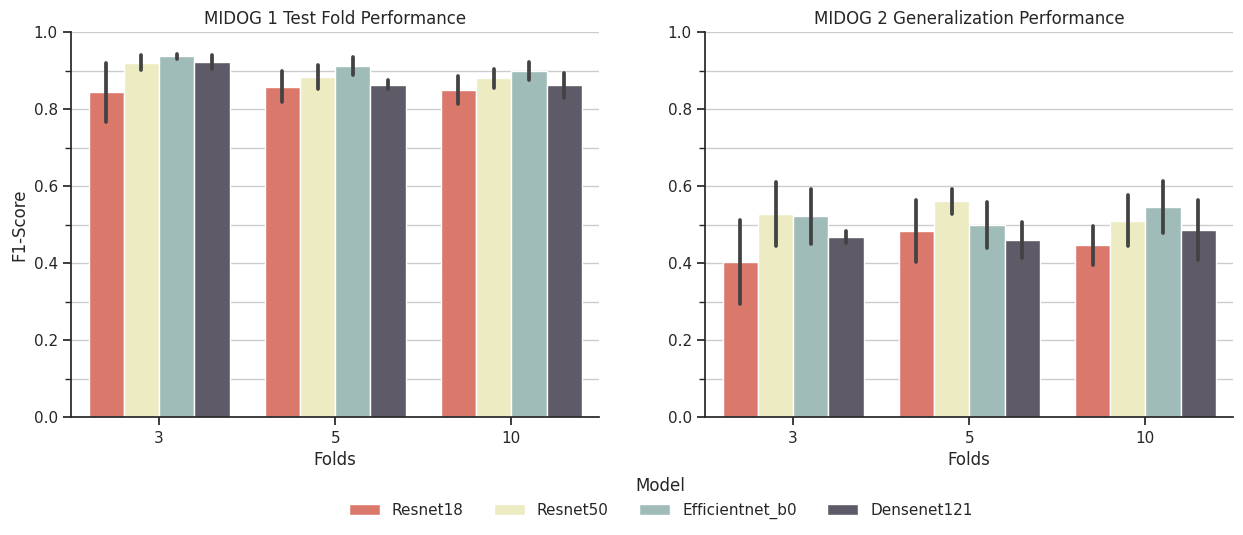

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(all_test_res, x='folds', y='final/test_BinaryF1Score', hue='type', errorbar='sd', ax=ax[0])
ax[0].set_ylabel('F1-Score')
ax[0].set_xlabel('Folds')
minor_ticks = np.arange(0,1,0.1)
ax[0].set_yticks(minor_ticks, minor=True)
ax[0].grid(axis='y', which='both')
ax[0].set_ylim(0,1)
ax[0].get_legend().remove()
ax[0].set_title('MIDOG 1 Test Fold Performance')

sns.barplot(all_infer_res, x='folds', y='BinaryF1Score', hue='type', errorbar='sd', ax=ax[1])
ax[1].set_title('MIDOG 2 Generalization Performance')
ax[1].set_yticks(minor_ticks, minor=True)
ax[1].grid(axis='y', which='both')
ax[1].set_xlabel('Folds')
ax[1].set_ylabel('')
ax[1].set_ylim(0,1)
ax[1].legend(loc='lower left', bbox_to_anchor=(-0.7, -0.3),
    frameon=False, ncol=4, title ='Model')
new_labels = ['Resnet18', 'Resnet50', 'Efficientnet_b0', 'Densenet121']
for t, l in zip(ax[1].get_legend().texts, new_labels):
    t.set_text(l)
plt.savefig('./plots/KFOLD_BOTH.jpg', bbox_inches='tight')
plt.show()

In [48]:
all_infer_res.groupby(['folds', 'type']).agg({'BinaryF1Score': ['mean', 'std']})

BinaryF1Score          
                           mean       std
folds type                               
3     densenet121      0.468144  0.015218
      effnetb0         0.521185  0.072041
      resnet18         0.403189  0.109270
      resnet50         0.526611  0.083103
5     densenet121      0.460475  0.046896
      effnetb0         0.499748  0.060325
      resnet18         0.482530  0.080423
      resnet50         0.560578  0.032698
10    densenet121      0.486792  0.077632
      effnetb0         0.545833  0.067308
      resnet18         0.446224  0.050368
      resnet50         0.510506  0.066133

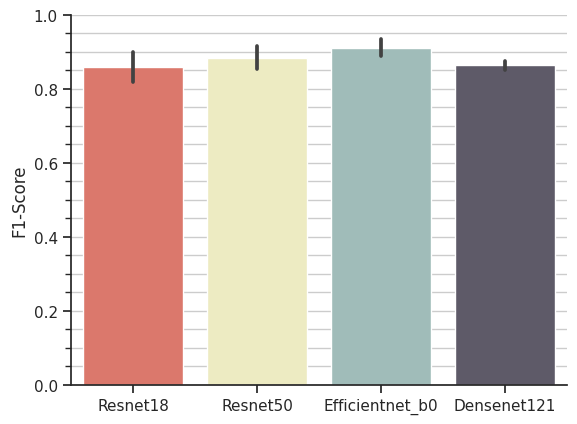

In [40]:
var_name = 'final/test_BinaryF1Score'
save_name = './plots/KFOLD_5_test.jpg'
show_kfold_result(test_df, var_name, save_name)

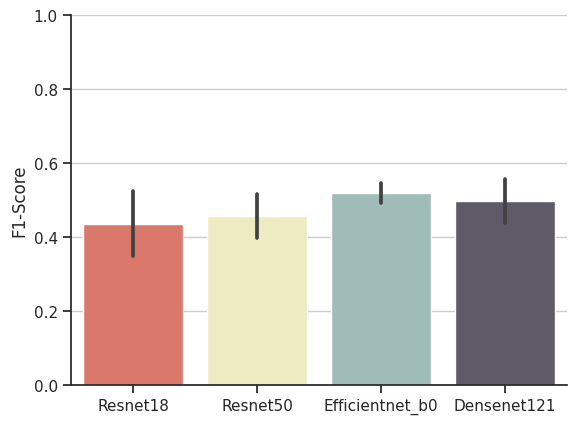

In [85]:
var_name = 'BinaryF1Score'
save_name = './plots/KFOLD_5_inferjpg'
show_kfold_result(infer_df, var_name, save_name)

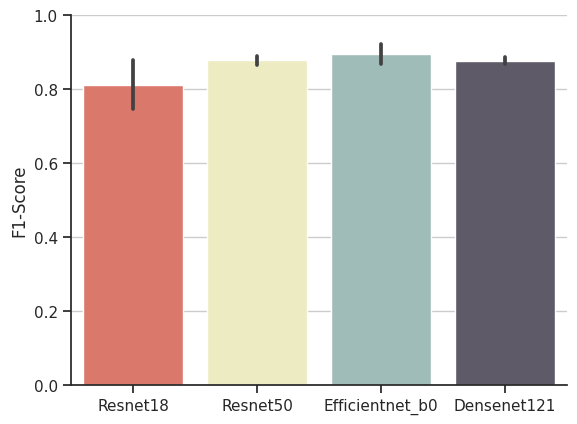

In [86]:
var_name = 'final/test_BinaryF1Score'
save_name = './plots/KFOLD_10_test.jpg'
show_kfold_result(test_10_df, var_name, save_name)

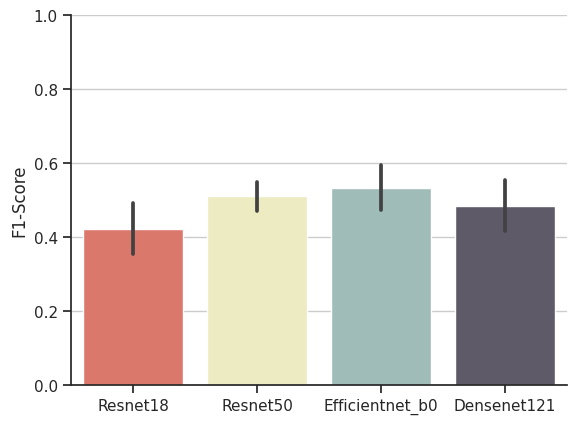

In [93]:
var_name = 'BinaryF1Score'
save_name = './plots/KFOLD_10_infer.jpg'
show_kfold_result(infer_10_df, var_name, save_name)

### Train on MIDOG2 and eval on MIDOG1

In [96]:
res1 = {'resnet18': './results/KFOLD_5_resnet18_M2_s42/summary_test.csv' }
res2 = {'resnet50': './results/KFOLD_5_resnet50_M2_s42/summary_test.csv'}
res3 = {'effnetb0': './results/KFOLD_5_effnetb0_M2_s42/summary_test.csv'}
res4 = {'densenet121': './results/KFOLD_5_densenet121_M2_s42/summary_test.csv'}

res5 = {'resnet18': './eval_results/KFOLD_5_resnet18_MIDOG1/summary.csv' }
res6 = {'resnet50': './eval_results/KFOLD_5_resnet50_MIDOG1/summary.csv'}
res7 = {'effnetb0': './eval_results/KFOLD_5_effnetb0_MIDOG1/summary.csv'}
res8 = {'densenet121': './eval_results/KFOLD_5_densenet121_MIDOG1/summary.csv'}

In [97]:
test_5_df = combine_results((res1, res2, res3, res4))
infer_5_df = combine_results((res5, res6, res7, res8))

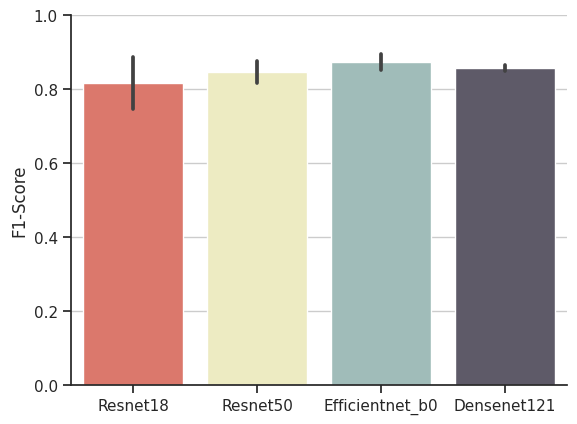

In [98]:
var_name = 'final/test_BinaryF1Score'
save_name = './plots/KFOLD_5_test_M2.jpg'
show_kfold_result(test_5_df, var_name, save_name)

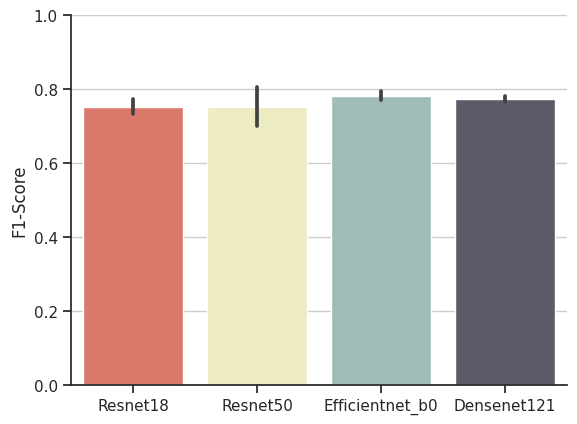

In [99]:
var_name = 'BinaryF1Score'
save_name = './plots/KFOLD_5_infer_M2.jpg'
show_kfold_result(infer_5_df, var_name, save_name)

In [54]:
def f1(x):
    return 1 - np.exp(x) 


def f2(x):
    return 1 + np.exp(x)


def f3(x):
    return f1(x) + f2(x)

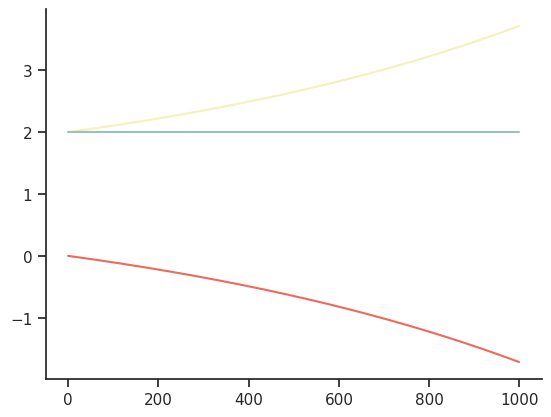

In [56]:
x = np.arange(0, 1, step=0.001)


plt.figure()
plt.plot(f1(x))
plt.plot(f2(x))
plt.plot(f3(x))
plt.show()